In [2]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
sys.path.insert(1, oj(sys.path[0], '..', 'vision_fit'))  # insert parent path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
import math
# plt.style.use('dark_background')
from collections import OrderedDict
from sklearn import preprocessing

import torch
from torch.autograd import Variable
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

from vision_fit import data
import viz_weights
from process_results import process_results

%matplotlib inline
%load_ext autoreload
%autoreload 2

import style
cb = '#008fd5'
cr = '#fc4f30'

In [3]:
style.set_style()

# load results from a directory

In [16]:
# depending on how much is saved, this may take a while
out_dir = '/scratch/users/vision/yu_dl/raaz.rsk/track_acts/resweep_full_new'
fnames = sorted([oj(out_dir, fname) for fname in os.listdir(out_dir)
                 if not fname.startswith('weights')
                 and not fname.startswith('idx')
                 and 'cifar' in fname
                 and 'opt=sgd' in fname
                 and 'numlays=4' in fname])
results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in tqdm(fnames)]
results = pd.concat(results_list, axis=1).T.infer_objects()
# print(results.shape)

100%|██████████| 83/83 [00:06<00:00, 12.92it/s]


**add cols**

In [30]:
# adds these vec keys: fc0_fro, fc1_fro, fc0_stab_rank, fc1_stab_rank, act0_stab_rank, act1_stab_rank, corr0, corr1
# adds these scalar keys: max_train_acc, max_test_acc, _final of all the above
# print('before', results.shape)
its, ts, results = process_results(results)
epoch = int(max(ts))
print('after', results.shape)

after (70, 84)


# plot max corrs vs accs
*note some things disappear in below plot as a result of nans*

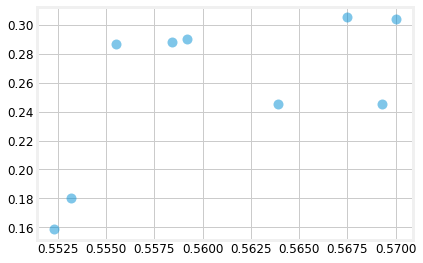

In [65]:
r = results
# r = r[r.dset == 'mnist']
# r = r[r.hidden_size == 128]
r = r[r.max_test_acc >= 0.55]
r = r[r.dset == 'cifar10']
r = r[r.optimizer == 'sgd']
# plt.figure(figsize=(14, 14), facecolor='w', dpi=100)
x = np.array(r.max_test_acc)
y = np.array(r.corr0_final)
plt.plot(x, y, 'o')

pids = r.pid


plt.show()

In [71]:
def check_pid(s, pids):
    for pid in pids:
        if pid in s:
            return True
    return False

In [72]:
# depending on how much is saved, this may take a while
out_dir = '/scratch/users/vision/yu_dl/raaz.rsk/track_acts/resweep_full_new'
fnames = sorted([oj(out_dir, fname) for fname in os.listdir(out_dir) 
                 if 'weights' in fname
                 and 'cifar' in fname
                 and check_pid(fname, pids)])
#                  if pid in fname]) 
print(len(fnames))

# weights
fnames_w = [fname for fname in fnames if 'weights' in fname]
results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in fnames_w]
rw = pd.concat(results_list, axis=1).T.infer_objects()

print(rw.shape)

9
(9, 28)


dict_keys(['fc.0.weight', 'fc.1.weight', 'fc.1.bias', 'fc.0.bias', 'fc.2.bias', 'fc.2.weight', 'fc.3.bias', 'fc.3.weight'])


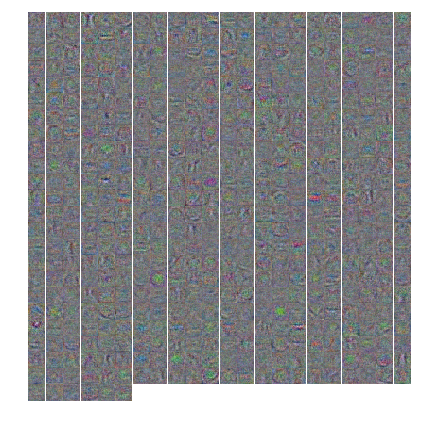

In [77]:
from matplotlib.ticker import NullLocator

def get_w(run):
    lay = 'fc.0.weight'

    # keys are epochs, vals are dicts of all weights
    weights_dict_dict = run['weights']

    # keys are layers, vals are weight values
#     print(weights_dict_dict.keys())
#     print(ts, list(weights_dict_dict.keys()))
    epoch = max(weights_dict_dict.keys())
    weights_dict = weights_dict_dict[epoch]
#     print(weights_dict.keys())
    w = weights_dict[lay]

    return w

run = rw.iloc[3]
w = get_w(run)
# matrix of weights (output x input)
# viz_weights.plot_weights(w, dset='mnist', C=18, dpi=120)
viz_weights.plot_weights(w, dset='cifar10') #, dpi=120)

plt.gca().set_axis_off()
plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())
plt.margins(0, 0)

In [ ]:
print(w.shape)